# Template Matching

Tiffany Wang, 260684152

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

#### 1. Given a reference image (scene of an amusement park) and a template image (face of Waldo), iterate over all pixel locations of reference image and compare the local patch with template image using sum of square distance (SSD) metric. Display SSD for whole image. Find the location ((x; y) coordinate) where the SSD is minimum and see if you can find Waldo there!

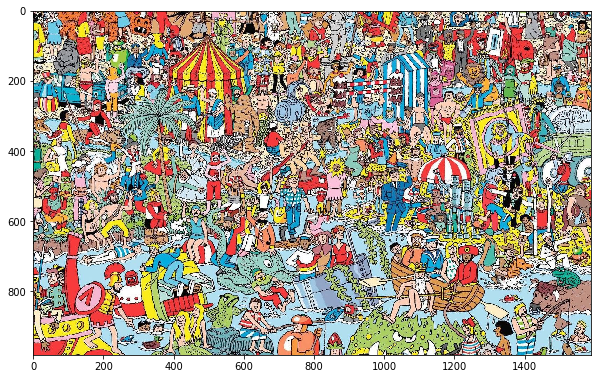

In [2]:
map = cv2.imread('where_is_waldo.jpg')
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(map)

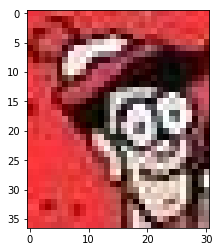

In [3]:
waldo = cv2.imread('template1.png')
waldo = cv2.cvtColor(waldo, cv2.COLOR_BGR2RGB)
plt.imshow(waldo)

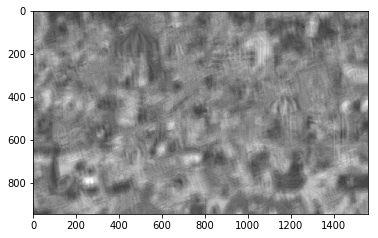

In [4]:
# Find the SSD at each location 
scene_clean = map.copy()
res = cv2.matchTemplate(scene_clean,waldo,cv2.TM_SQDIFF)
plt.imshow(res, cmap="gray")

In [5]:
# figure out the location with the minimum SSD. This is where Waldo is. 
_, _, min_loc, _ = cv2.minMaxLoc(res)

print("Waldo's location: ", min_loc)

Waldo's location:  (1258, 74)


In [ ]:
# draw box on the map around Waldo
top_left = min_loc
h, w, _ = waldo.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(scene_clean, top_left, bottom_right, (255, 255, 0), 5)
plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(scene_clean)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

cv2.rectangle(res, top_left, bottom_right, (255, 255, 255), 5)
plt.subplot(122),plt.imshow(res, cmap="gray")
plt.xticks([]), plt.yticks([])

plt.show()

#### 2. Repeat above process with the noisy template as shown in Figure 3(c).

In [ ]:
waldo_noisy = cv2.imread('template2.png')
waldo_noisy = cv2.cvtColor(waldo_noisy, cv2.COLOR_BGR2RGB)
plt.imshow(waldo_noisy)

In [ ]:
# Find the SSD at each location 
scene_noisy = map.copy()
res_noisy = cv2.matchTemplate(scene_noisy,waldo_noisy,cv2.TM_SQDIFF)
plt.imshow(res_noisy, cmap="gray")

In [12]:
# figure out the location with the minimum SSD. This is where the noisy Waldo is. 
_, _, min_loc_noisy, _ = cv2.minMaxLoc(res_noisy)

print("Waldo's location: ", min_loc_noisy)

Waldo's location:  (1258, 74)


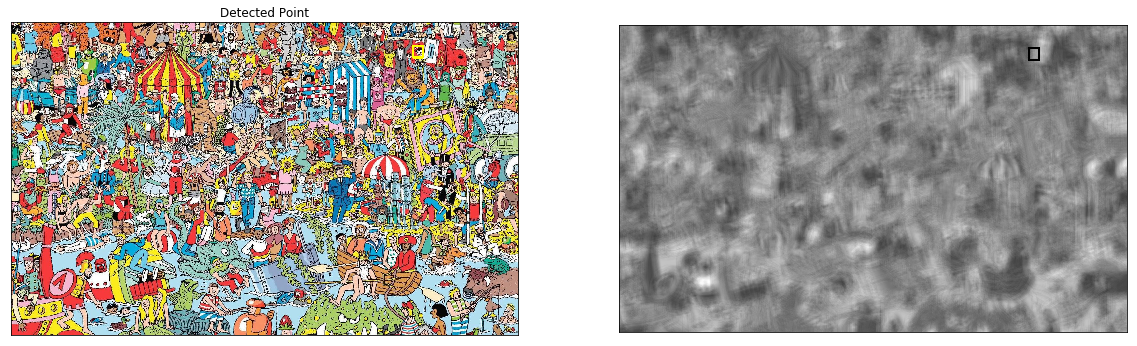

In [13]:
# draw box on the map around Waldo
h, w, _ = waldo.shape
top_left = min_loc_noisy
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(scene_noisy, top_left, bottom_right, (255,255,0), 5)
plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(scene_noisy)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

cv2.rectangle(res_noisy, top_left, bottom_right, (255,255,0), 5)
plt.subplot(122),plt.imshow(res_noisy, cmap="gray")
plt.xticks([]), plt.yticks([])

plt.show()